In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from bitcoin import engine
df = engine.load_data('BTC-USD')
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
0,1520272320,11488.90,11498.86,11498.86,11488.9,1.483969,0.104927,1063075.0,0.034975,0.170432
1,1520272380,11493.10,11493.10,11493.10,11493.1,0.499374,0.104928,1063083.0,0.034975,0.170432
2,1520272440,11486.10,11493.01,11493.00,11486.1,3.876386,0.104928,1063089.0,0.034975,0.170432
3,1520272500,11486.10,11486.10,11486.10,11486.1,0.661000,0.104928,1063091.0,0.034975,0.170432
4,1520272560,11486.31,11490.50,11486.32,11487.4,0.787136,0.104928,1063095.0,0.038833,0.170432


In [2]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
count,1.570000e+02,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,1.570000e+02,157.000000,157.000000
mean,1.520277e+09,11583.230510,11584.727643,11583.884841,11584.047771,2.040352,0.092293,1.107770e+06,0.047821,0.165779
std,2.728271e+03,63.177044,63.261206,63.321032,63.148553,2.806156,0.006130,6.598184e+04,0.008833,0.009973
min,1.520272e+09,11481.940000,11481.960000,11481.960000,11481.960000,0.005760,0.082966,1.039913e+06,0.034975,0.140528
25%,1.520275e+09,11498.860000,11498.870000,11498.870000,11498.870000,0.597247,0.089854,1.049016e+06,0.038833,0.169182
50%,1.520277e+09,11618.990000,11619.390000,11619.000000,11619.380000,1.477900,0.092313,1.057247e+06,0.048710,0.169182
75%,1.520279e+09,11638.400000,11638.440000,11638.430000,11638.430000,2.470791,0.094030,1.173600e+06,0.058175,0.170432
max,1.520282e+09,11643.490000,11645.360000,11644.000000,11643.990000,27.523193,0.106180,1.193861e+06,0.095212,0.171182


In [3]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
time,1.000000,0.826373,0.821411,0.823514,0.824489,0.048324,-0.480256,0.384257,0.902922,-0.621042
low,0.826373,1.000000,0.997050,0.998154,0.998810,0.128473,-0.648400,-0.064508,0.758906,-0.351225
high,0.821411,0.997050,1.000000,0.998765,0.998161,0.164339,-0.646025,-0.070434,0.756311,-0.346190
open,0.823514,0.998154,0.998765,1.000000,0.996849,0.137495,-0.645345,-0.067161,0.758472,-0.348815
close,0.824489,0.998810,0.998161,0.996849,1.000000,0.154889,-0.649346,-0.067360,0.756723,-0.348599
volume,0.048324,0.128473,0.164339,0.137495,0.154889,1.000000,-0.113653,-0.133066,0.023130,0.014554
tw_sentiment,-0.480256,-0.648400,-0.646025,-0.645345,-0.649346,-0.113653,1.000000,0.185237,-0.304412,0.003022
tw_followers,0.384257,-0.064508,-0.070434,-0.067161,-0.067360,-0.133066,0.185237,1.000000,0.377054,-0.405248
reddit_sentiment,0.902922,0.758906,0.756311,0.758472,0.756723,0.023130,-0.304412,0.377054,1.000000,-0.614830
google_sentiment,-0.621042,-0.351225,-0.346190,-0.348815,-0.348599,0.014554,0.003022,-0.405248,-0.614830,1.000000


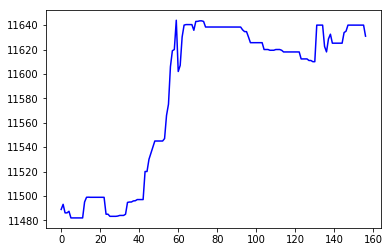

In [4]:
plt.plot(df['close'], 'b')

In [ ]:
X_train, X_test, y_train, y_test, scaler_x, scaler_y = engine.prepare(df)

In [ ]:
model, history = engine.train(X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 485,801
Trainable params: 485,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error']), 'g'

In [ ]:
import numpy as np

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

y_predict_train = model.predict(X_train)
y_predict_train = scaler_y.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scaler_y.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')

In [ ]:
engine.test_order_percent(df, model, scaler_x, scaler_y)